In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

In [3]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to the list
    if city not in cities:
        cities.append(city)

len(cities)

594

In [5]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ee057398ad8896d92f03e0183e7d81f


In [25]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | saurimo
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | tezu
Processing Record 9 of Set 1 | esperance
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | den helder
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | conde
Processing Record 19 of Set 1 | salalah
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | samusu
City not found. Skipping...
Processing Record 23 of Se

KeyboardInterrupt: 

In [7]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,60.19,82,100,3.00,ZA,2022-09-23 19:48:17
1,Ushuaia,-54.8000,-68.3000,53.26,40,40,10.36,AR,2022-09-23 19:48:18
2,Hilo,19.7297,-155.0900,86.29,74,0,7.00,US,2022-09-23 19:48:18
3,Saurimo,-9.6608,20.3916,76.17,42,79,1.88,AO,2022-09-23 19:48:19
4,Atuona,-9.8000,-139.0333,76.03,81,18,14.34,PF,2022-09-23 19:48:19
5,Barrow,71.2906,-156.7887,33.82,86,100,11.50,US,2022-09-23 19:48:19
6,Airai,-8.9266,125.4092,60.67,52,90,2.84,TL,2022-09-23 19:48:20
7,Tezu,27.9167,96.1667,73.69,95,100,2.62,IN,2022-09-23 19:48:20
8,Esperance,-33.8667,121.9000,56.86,75,57,11.41,AU,2022-09-23 19:45:39
9,Yellowknife,62.4560,-114.3525,57.72,51,20,11.50,CA,2022-09-23 19:45:13


In [8]:
#Reorder columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-09-23 19:48:17,-33.5906,26.8910,60.19,82,100,3.00
1,Ushuaia,AR,2022-09-23 19:48:18,-54.8000,-68.3000,53.26,40,40,10.36
2,Hilo,US,2022-09-23 19:48:18,19.7297,-155.0900,86.29,74,0,7.00
3,Saurimo,AO,2022-09-23 19:48:19,-9.6608,20.3916,76.17,42,79,1.88
4,Atuona,PF,2022-09-23 19:48:19,-9.8000,-139.0333,76.03,81,18,14.34
...,...,...,...,...,...,...,...,...,...
548,Venezuela,VE,2022-09-23 20:02:36,8.0000,-66.0000,90.01,54,100,7.18
549,Knysna,ZA,2022-09-23 20:02:36,-34.0363,23.0471,55.89,70,100,5.06
550,Vestmannaeyjar,IS,2022-09-23 20:02:38,63.4427,-20.2734,49.77,83,59,9.42
551,Vagur,FO,2022-09-23 20:02:38,61.4732,-6.8119,50.50,78,13,16.04


In [9]:
#Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the Data

In [10]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

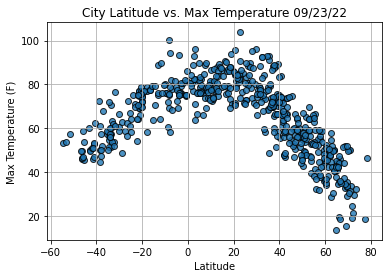

In [11]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig1.png")

#Show plot.
plt.show()

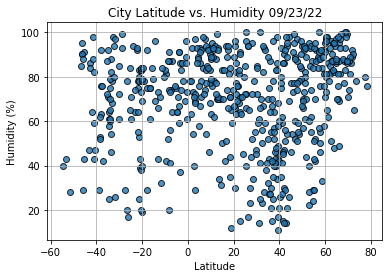

In [12]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig2.png")

#Show plot.
plt.show()

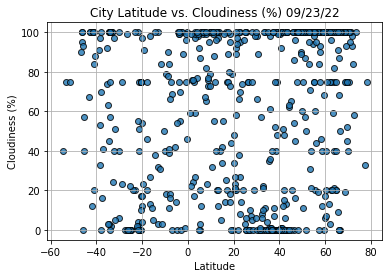

In [13]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig3.png")

#Show plot.
plt.show()

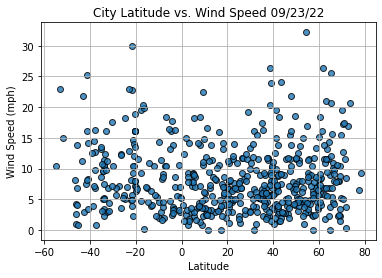

In [14]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig4.png")

#Show plot.
plt.show()

## Creating Linear Regressions

In [15]:
#Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
#Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

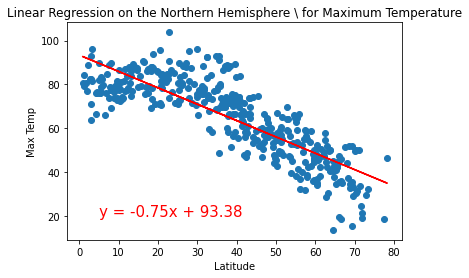

In [17]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp', (5,20))

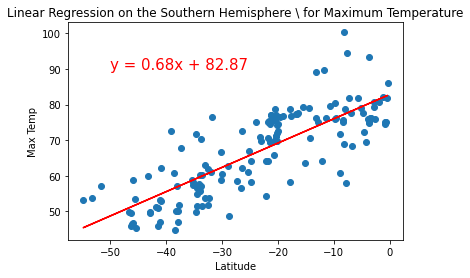

In [18]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))

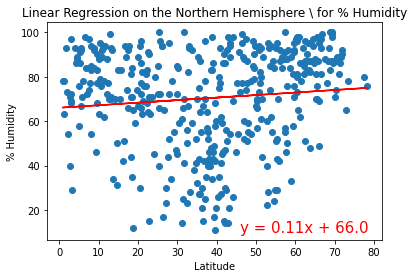

In [19]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(46,10))

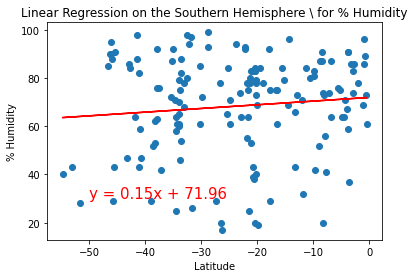

In [20]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,30))

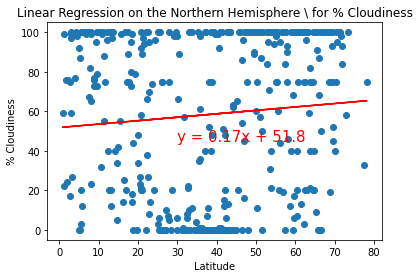

In [21]:
#Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Cloudiness', '% Cloudiness',(30,45))

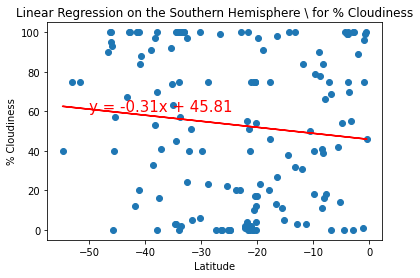

In [22]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

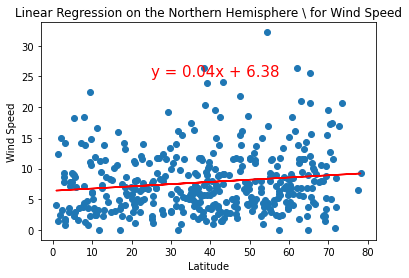

In [23]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Wind Speed', 'Wind Speed',(25,25))

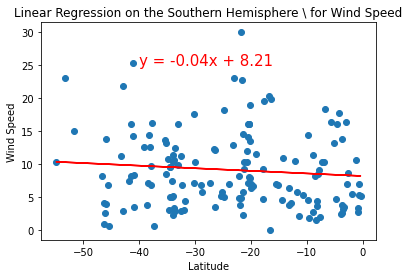

In [24]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Wind Speed', 'Wind Speed',(-40,25))